In [219]:
import os
os.getcwd() #shows the current working directory

'/content'

In [0]:
import numpy as np # pulls in numpy package
import pandas as pd # pulls in pandas package
import matplotlib as mpl
import matplotlib.pyplot as plt # pulls in matplotlib plotting package
import seaborn as sns # pulls in seaborn package

In [0]:
import sklearn # use sklearn for the regression and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [222]:
abalonedf = pd.read_csv('abalone.csv') # pulls in my csv file 
abalonedf.shape # shows the number of rows/records and columns/variables 

(4177, 9)

In [223]:
abalonedf.head() # shows the first 5 rows of data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The abalone.csv file contains 4,177 rows of data about the gender (M/F/infant), size (length, diameter, height), weight (whole, shucked, viscera, shell) and age (rings) of marine snails called abalone (9 variables). 
The data comes from https://www.kaggle.com/rodolfomendes/abalone-dataset/version/3#abalone.csv 
The number of rings plus 1.5 gives the estimated age of the abalone in years.  We can use the length and other size variables to predict the rings/age. 

In [224]:
abalonedf.dtypes # shows the data types for each variable

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [225]:
abalonedf.describe(include='all') 
# shows the descriptive statistics for each variable
# include all means it will show qualitative and quantitative variables

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [226]:
abalonedf.keys() 

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

This is a dataframe so it shows the index of the variables.
The Boston Housing data is a dictionary which has keys and values. 

Make a plot of the length and number of rings/age.

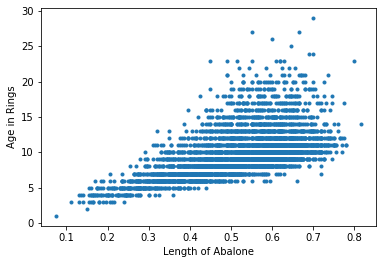

In [227]:
_ = plt.plot(abalonedf['Length'], abalonedf['Rings'], marker='.', linestyle='none') 
# this provides a scatter plot of the length and age/rings
_ = plt.xlabel('Length of Abalone')
_ = plt.ylabel('Age in Rings')
_ = plt.show()

This looks like a correlation between the length of the abalone and their age in rings. 

In [0]:
x = abalonedf.iloc[:, 1:7] # this selects all rows and columns 2-8
y = abalonedf.iloc[:,-1] # this selects all rows and only the last column

Split the data into train and test data.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 9)

In [230]:
x_train.shape, y_train.shape

((2923, 6), (2923,))

In [231]:
x_test.shape, y_test.shape

((1254, 6), (1254,))

Fit the training data to a linear model.

In [232]:
regressor = LinearRegression()
regressor.fit(x_train, y_train) # trains the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use the model to predict the test data.

In [0]:
y_predicted = regressor.predict(x_test) # this makes predictions on the testing set.

Measure the accuracy of the model by using the mean square error (MSE).

First using Numpy.

In [234]:
mean_sq_error = np.mean((y_test - y_predicted) **2)
print(mean_sq_error)

5.223531192185664


Using sklearn metrics.

In [235]:
print(mean_squared_error(y_true = y_test, y_pred = regressor.predict(x_test)))

5.2235311921856615


The mean squared error is the same calculated either way (with either package).

Print the error on the training data.

In [236]:
print(mean_squared_error(y_true = y_train, y_pred = regressor.predict(x_train)))

4.882281029035272


How much does the model (the x variable) explain the variability of the response data around its mean?

In [237]:
regressor.score(x_test, y_test) # this means this model fits/explains about 50% of the variability, which is not great.
# We would like the score to be closest to 1 to indicate a higher degree of accuracy in predicting the output.

0.501520917106238

Check histogram of the residuals. does it satisfy the assumptions for inference?

(array([  4.,  18., 202., 585., 272., 106.,  42.,  15.,   8.,   2.]),
 array([-7.63779108, -5.6245833 , -3.61137551, -1.59816773,  0.41504005,
         2.42824784,  4.44145562,  6.45466341,  8.46787119, 10.48107897,
        12.49428676]),
 <a list of 10 Patch objects>)

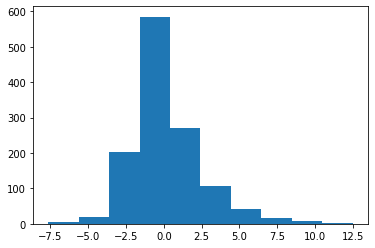

In [238]:
plt.hist(y_test - y_predicted)

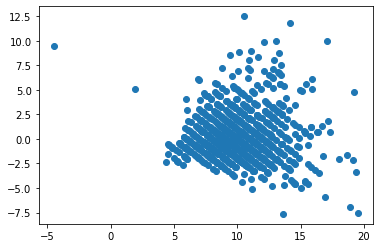

In [239]:
plt.scatter(y_predicted, y_test - y_predicted)

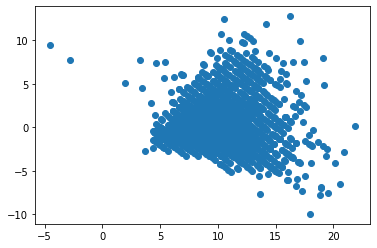

In [240]:
plt.scatter(regressor.predict(x), y - regressor.predict(x))

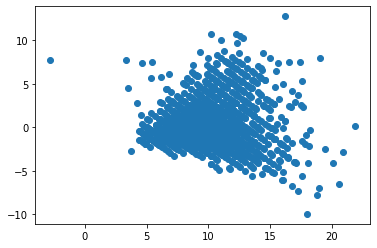

In [241]:
plt.scatter(regressor.predict(x_train), y_train - regressor.predict(x_train))

In [242]:
print(regressor.coef_)

[ -4.01944409  17.347466    10.53933219  14.00280227 -23.90503801
 -13.82283176]


In [243]:
print(regressor.intercept_)

2.935835865426773


In [244]:
# finds values for metrics using test data
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))


Mean Absolute Error:  1.6380470856608034
Mean Squared Error:  5.2235311921856615
Root Mean Squared Error:  2.28550458152804


This is just another way to look at it.

In [245]:
rmsd = np.sqrt(mean_squared_error(y_test, y_predicted))
r2_value = r2_score(y_test, y_predicted)

print("Intercept:  \n", regressor.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept:  
 2.935835865426773
Root Mean Square Error 
 2.28550458152804
R^2 Value: 
 0.501520917106238


In [246]:
df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_predicted})
print(df.head(10))

      Actual  Predicted
891       17  19.113456
2635       7   7.650268
1294       9   9.304994
1517      10  11.853680
1002       9  10.041744
3093      11  10.683658
3605       8   7.728871
909        7   6.536866
71         8   8.261356
1100       9   9.542621
